# Lineárna regresia
Tento jupyter notebook obsahuje všetok kód, ktorý bol vo videách prvej kapitoly - lineárna regresia.

Odporúčam ti aby si si všetko cez čo sme prešli naprogramoval a skúsil sám, bez toho aby si používal tento dokument.

## Importy
prvé čo musíme spraviť sú importy + pred prvým importom musím vykonať všetky magic príkazy, ktoré chcem. Ak by som magic príkazy spravil neskôr, nemusia fungovať.

Niektoré knižnice importujeme spôsobom
```python
import numpy as np
```
kedy knižnicu premenujeme na nejakú skratku. Je to užitočné ak sa chceš vyhnúť písaniu. Inak to nemá nejaký funkčný vpliv na nič.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Základy práce s numpy
Predtým, než sa pusíme do práce, potrebujem získať skúsenosti práce s numpy a inými knižnicami.

Rozdieľ medzi python listom a numpy polom je priepastný. Python pole je v podstate obyčajné pole, zatiaľ čo numpy vytvára vektory alebo matice.

In [2]:
foo = [1, 2, 3]
bar = np.array([1,2,3])

In [3]:
foo

[1, 2, 3]

In [4]:
bar

array([1, 2, 3])

In [5]:
type(bar)

numpy.ndarray

Funkcia `np.arange` spadá medzi generátory. Vie vytvoriť numpy __vektor__ s určeným počtom prvkov.

```python
np.arange([start], stop, [step])
```

Taktiež môžeme špecifikovať `start` a `stop`, čo je začiatok a koniec intervalu. `step` určuje krok medzi prvkami.

In [6]:
np.arange(5, 25, 5)

array([ 5, 10, 15, 20])

argumenty `start` a `step` sú dobrovoľné. Ak ich nezadáme získame obyčajné pole s prvkami.

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Toto je vektor

In [8]:
vector = np.array([1,2,3])
print(vector)

[1 2 3]


Toto je matica. Matica má vždy 2 a viac rozmerov.

In [9]:
matrix = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Atribút `shape` nám prezradí aké rozmery má matica. S týmto údajom budeme často pracovať. Prvé číslo je počet riadkov, druhé číslo je počet stĺpcov.

In [10]:
vector = np.array([1,2,3])
vector.shape

(3,)

In [11]:
matrix = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

matrix.shape

(3, 3)

Pomocou funkcie `reshape` vieme zmeniť tvar matice. Vznikne tým __nová__ matica, ktorá bude mať preusporiadané prvky do požadovaného tvaru.

Ak matica (alebo vektor) nebude mať dosť prvkov aby sa vytvoril požadovaný tvar, skončí to chybou.

In [12]:
vector = np.arange(9)
vector

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
matrix = vector.reshape((3,3))
matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Generátory
generátory sú funkcie knižnice `numpy`, ktoré vedia generovať vektory / matice. Stačí zadať požadovaný tvar ako dvojicu (python typ `tuple`).

Na [stránke dokumentácie](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) vieš nájsť týchto generátorov plno.

In [14]:
np.zeros((4,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [16]:
# randn generuje aj záporné čísla
# rand generuje v intervale 0-1

np.random.randn(3, 2)

array([[-0.64372486,  0.51678571],
       [ 0.16654791,  0.48080749],
       [-0.70466404, -1.68676302]])

funkcia `linspace` ako už napovedá názov tejto funkcie, vie rozdeliď určený interval na definovaný počet dielikov. Toto sa veľmi hodí pri vykreslovaní funkcií. Je to jednoduchšie ako používať generátor `arange`

In [17]:
np.linspace(0, 10, 40)

array([ 0.        ,  0.25641026,  0.51282051,  0.76923077,  1.02564103,
        1.28205128,  1.53846154,  1.79487179,  2.05128205,  2.30769231,
        2.56410256,  2.82051282,  3.07692308,  3.33333333,  3.58974359,
        3.84615385,  4.1025641 ,  4.35897436,  4.61538462,  4.87179487,
        5.12820513,  5.38461538,  5.64102564,  5.8974359 ,  6.15384615,
        6.41025641,  6.66666667,  6.92307692,  7.17948718,  7.43589744,
        7.69230769,  7.94871795,  8.20512821,  8.46153846,  8.71794872,
        8.97435897,  9.23076923,  9.48717949,  9.74358974, 10.        ])

### Rozdeľovanie matice
Niekedy potrebujeme maticu rozrezať a s tým nám pomôže funkcia `split`. Vieme rezať horizontálne `axis=0` alebo vertikálne `axis=1`.

Rozdeľovať môžeme podla ľubovoľného stĺpca. To je druhý argument `[index stĺpca]`. Argument musí byť ako pole (pretože vieme definovať ľubovoľný počet rezov)

In [18]:
a, b = np.split(matrix, [1], axis=1)

In [19]:
matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
a

array([[0],
       [3],
       [6]])

In [21]:
b

array([[1, 2],
       [4, 5],
       [7, 8]])

#### vertical split `axis=1`
```text

                                  ^                                         
      data                        |                   inputs       targets         
[                        [        |                 [            [        
  [ 1.1,  1979 ],          [ 1.1, | 1979 ],           [ 1.1 ],     [ 1979 ], 
  [ 1.3,  2498 ],          [ 1.3, | 2498 ],           [ 1.3 ],     [ 2498 ], 
  [ 1.5,  1857 ],          [ 1.5, | 1857 ],           [ 1.5 ],     [ 1857 ], 
  [ 2.0,  2295 ],          [ 2.0, | 2295 ],           [ 2.0 ],     [ 2295 ], 
  [ 2.2,  2020 ],          [ 2.2, | 2020 ],           [ 2.2 ],     [ 2020 ], 
  [ 2.9,  3288 ],          [ 2.9, | 3288 ],           [ 2.9 ],     [ 3288 ], 
  [ 3.0,  3554 ],   --->   [ 3.0, | 3554 ],  --->     [ 3.0 ],     [ 3554 ], 
  [ 3.2,  3122 ],          [ 3.2, | 3122 ],           [ 3.2 ],     [ 3122 ], 
  [ 3.2,  3879 ],          [ 3.2, | 3879 ],           [ 3.2 ],     [ 3879 ], 
  [ 3.7,  3330 ],          [ 3.7, | 3330 ],           [ 3.7 ],     [ 3330 ], 
  [ 3.9,  3786 ],          [ 3.9, | 3786 ],           [ 3.9 ],     [ 3786 ], 
  [ 4.0,  3224 ],          [ 4.0, | 3224 ],           [ 4.0 ],     [ 3224 ], 
  [ 4.0,  3312 ],          [ 4.0, | 3312 ],           [ 4.0 ],     [ 3312 ], 
  [ 4.1,  3322 ]           [ 4.1, | 3322 ]            [ 4.1 ],     [ 3322 ]  
                 ]                |        ]                  ]             ]
                                  |
                                  v
```

#### horizontal split `axis=0`
```text
      data                                        [         
[                        [                          [ 1.1, 1979 ], 
  [ 1.1,  1979 ],          [ 1.1, 1979 ],           [ 1.3, 2498 ],   data_1
  [ 1.3,  2498 ],          [ 1.3, 2498 ],           [ 1.5, 1857 ] 
  [ 1.5,  1857 ],          [ 1.5, 1857 ],                         ]
  [ 2.0,  2295 ],        <---------------->       
  [ 2.2,  2020 ],          [ 2.0, 2295 ],        
  [ 2.9,  3288 ],          [ 2.2, 2020 ],         [
  [ 3.0,  3554 ],   --->   [ 2.9, 3288 ],  --->     [ 2.0, 2295 ], 
  [ 3.2,  3122 ],          [ 3.0, 3554 ],           [ 2.2, 2020 ], 
  [ 3.2,  3879 ],          [ 3.2, 3122 ],           [ 2.9, 3288 ], 
  [ 3.7,  3330 ],          [ 3.2, 3879 ],           [ 3.0, 3554 ], 
  [ 3.9,  3786 ],          [ 3.7, 3330 ],           [ 3.2, 3122 ],   data_2
  [ 4.0,  3224 ],          [ 3.9, 3786 ],           [ 3.2, 3879 ], 
  [ 4.0,  3312 ],          [ 4.0, 3224 ],           [ 3.7, 3330 ], 
  [ 4.1,  3322 ]           [ 4.0, 3312 ],           [ 3.9, 3786 ], 
                 ]         [ 4.1, 3322 ]            [ 4.0, 3224 ], 
                                         ]          [ 4.0, 3312 ], 
                                                    [ 4.1, 3322 ]  
                                                                  ]
```

### Násobenie matíc
je trošku komplikovanejšie ako obyčajné násobenie. Nemôžeme násobiť ľubovoľné matice, ale len také, ktoré majú správny počet stĺpcov a riadkov.

Taktiež záleží na poradí členov, to znamená, že násobenie matíc __nieje__ komutatívna operácia.

In [22]:
A = np.array([
    [-4, 2, -1],
    [4, 2, 6],
    [-7, 5, 9]
])

B = np.array([
    [9, 2, 3],
    [2, 7, 6],
    [7, 3, 8]
])

In [23]:
np.dot(A, B)

array([[-39,   3,  -8],
       [ 82,  40,  72],
       [ 10,  48,  81]])

## Základy práce s pandas
pandas nám viem veľmi pomôcť s načítavaním dát z disku. Hlavne CSV súbory

Príkazom `read_csv` vieme načítať súbor a nechať si zobrazovať rôzne štatistiky

In [24]:
data = pd.read_csv("dataset/salary_dataset.csv")
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,5070.933333
std,2.837888,2070.992764
min,1.100000,1857.000000
25%,3.200000,3386.000000
50%,4.700000,4828.000000
75%,7.700000,6933.000000
max,10.500000,8266.000000


Niekedy je užitočné vypísať `n` prvých alebo posledný prvkov. Na to používame funkcie `head` a `tail` tak ako poznáme z linuxových príkazov.

In [25]:
data.head(10)

,YearsExperience,Salary
0,1.1,1979
1,1.3,2498
2,1.5,1857
3,2.0,2295
4,2.2,2020
5,2.9,3288
6,3.0,3554
7,3.2,3122
8,3.2,3879
9,3.7,3330


In [26]:
data.tail(3)

,YearsExperience,Salary
27,9.6,7528
28,10.3,8266
29,10.5,8227


funkcia `sample` vyberá prvky náhodne. Veľmi užitočné ak chceme získať predstavu o dátach a máme ich usporiadané (ako v tomto príklade)

In [27]:
data.sample(10)

,YearsExperience,Salary
22,7.9,6670
16,5.1,4699
2,1.5,1857
0,1.1,1979
15,4.9,4844
6,3.0,3554
3,2.0,2295
4,2.2,2020
11,4.0,3924
25,9.0,6994


## Ručne stručne
Vizualizujeme si dáta a vysvetlíme si o čo ide v lineárnej regresií.

Dáta už máme načítane a preto postupujeme s ich úpravou. Rozdelíme si dáta na vstupné a výstupné premenné.

In [28]:
inputs, targets = np.split(data, [1], axis=1)

In [29]:
targets.head()

,Salary
0,1979.0
1,2498.0
2,1857.0
3,2295.0
4,2020.0


### Matplotlib
prvé použitie matplotlib na vizualizáciu dát.

`plt.figure()` vytvorí novú figúru, do ktorej môžeme kresliť grafy a upravovať ju podla našich predstáv.

`scatter` je funkcia, ktorá vykreslí naše dáta ako bodky na grafe.

Rôznymi inými funkciami vieme upravovať vzhľad grafu -> `xlabel`, `ylabel`, `title`...

Väčší tutorial o `matplotlib` som spravil v separátnom videu.

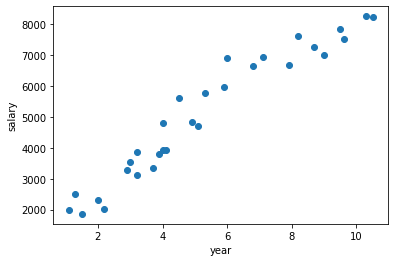

In [30]:
fig1 = plt.figure()

plt.scatter(inputs, targets)

plt.ylabel("salary")
plt.xlabel("year")

plt.show()

Nieje funkcia ako funkcia. Matematické ponímanie funkcií je trošku iné ako pythonovské, ale to nevadí. Klasickú definíciu funkcie si vieme naprogramovať v Pythone veľmi jednoducho

In [31]:
def F(x):
    y = a * x + c
    return y

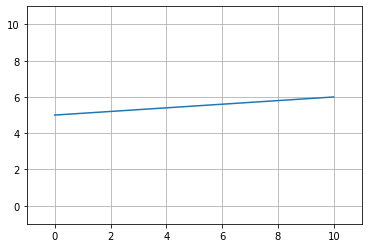

In [32]:
fig2 = plt.figure()

x = np.linspace(0, 10, 100)

# experimentuj s týmito hodnotami
a = 0.1
c = 5

def linear(x):
    return a*x + c

plt.plot(x, linear(x))

plt.ylim(bottom=-1, top=11)
plt.xlim(left=-1, right=11)

plt.grid()

plt.show()

Spojenie grafu funkcie a dát vieme spraviť jednoducho. Stačí do jednej figúry vykresliť `scatter` plot aj `plot` funkcie.

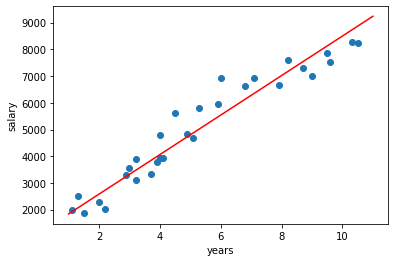

In [33]:
fig3 = plt.figure()

plt.scatter(inputs, targets)
plt.xlabel("years")
plt.ylabel("salary")

model = (740, 1100)

def F(x):
    a,c = model
    return a*x + c

x = np.linspace(1, 11, 10)
plt.plot(x, F(x), color="r")

plt.show()

In [34]:
# našli sme model, ktorý fituje naše dáta
model = (740, 1100)

In [35]:
F(3)

3320

## PyTorch a Gradient Descent
Knižnica pytorch používa základný dátový typ zvaný `tensor`. Je to niečo podobné ako `numpy` matica. Aj sa to tak správa, ale na pozadí sa dejú ešte veci navyše (autograd).

In [36]:
foo = torch.Tensor(np.array([1, 2, 3]))

In [37]:
foo

tensor([1., 2., 3.])

In [38]:
# vstupy a výstupy prekonvertujeme na Tensor
inputs = torch.Tensor(inputs.to_numpy())
targets = torch.Tensor(targets.to_numpy())

In [39]:
inputs

tensor([[ 1.1000],
        [ 1.3000],
        [ 1.5000],
        [ 2.0000],
        [ 2.2000],
        [ 2.9000],
        [ 3.0000],
        [ 3.2000],
        [ 3.2000],
        [ 3.7000],
        [ 3.9000],
        [ 4.0000],
        [ 4.0000],
        [ 4.1000],
        [ 4.5000],
        [ 4.9000],
        [ 5.1000],
        [ 5.3000],
        [ 5.9000],
        [ 6.0000],
        [ 6.8000],
        [ 7.1000],
        [ 7.9000],
        [ 8.2000],
        [ 8.7000],
        [ 9.0000],
        [ 9.5000],
        [ 9.6000],
        [10.3000],
        [10.5000]])

Vytvoríme __váhy__ (weights) a __bias__ (bias).

In [40]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

print(w)
print(b)

tensor([0.1255], requires_grad=True)
tensor([0.4383], requires_grad=True)


In [41]:
# dáme si to do akože "modelu"
model1 = (w, b)  # <- python tuple

Funkcia na použitie modelu. Model dávame ako argument a preto môžeme jednoducho skúšať viacero modelov


In [42]:
def use_model(x, model):
    w, b = model
    return x * w + b

In [43]:
preds = use_model(inputs, model1)
print(preds)

tensor([[0.5763],
        [0.6013],
        [0.6264],
        [0.6892],
        [0.7143],
        [0.8021],
        [0.8146],
        [0.8397],
        [0.8397],
        [0.9025],
        [0.9275],
        [0.9401],
        [0.9401],
        [0.9526],
        [1.0028],
        [1.0530],
        [1.0781],
        [1.1032],
        [1.1785],
        [1.1910],
        [1.2914],
        [1.3290],
        [1.4294],
        [1.4670],
        [1.5298],
        [1.5674],
        [1.6301],
        [1.6427],
        [1.7305],
        [1.7556]], grad_fn=<AddBackward0>)


Funkcia na vykreslenie dáta a modelu. Veľmi užitočné pri skúmání ako náš model fituje dáta.

In [44]:
def plot_model(inputs, targets, model):
    fig = plt.figure()
    plt.scatter(inputs, targets)
    
    x = torch.from_numpy(np.linspace(1, 11, 2))
    y = use_model(x, model).detach()
    plt.plot(x, y, color="r")
    plt.show()
    return fig

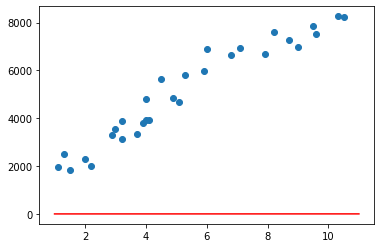

In [45]:
fig1 = plot_model(inputs, targets, model1)

### Chybová - loss funkcia
V našom prípade optimizačná funkcia bude zvaná `loss` funkcia. Na výpočet `loss` funkcie použijeme __M__ean __S__quare __E__rror (MSE)

In [46]:
def MSE(t1, t2):
    diff = t1 - t2
    sum_all = torch.sum(diff*diff)
    avarage_diff = sum_all / diff.numel()
    return avarage_diff

In [47]:
loss = MSE(preds, targets)
print(loss)

tensor(29847834., grad_fn=<DivBackward0>)


Výpočet gradiendu (derivácie) v tomto prípade bude otázka volania funkcie `backward`. Táto automagicky zabezpečí, že budeme mať vypočítané gradienty (smer v ktorom sa musíme posunúť aby sme znížili chybovú funkciu) na premenných `w` a `b`

In [48]:
loss.backward()

In [49]:
type(loss)

torch.Tensor

In [50]:
w, b = model1
print(w.grad)
print(b.grad)

tensor([-64831.2344])
tensor([-10139.6562])


### Gradient descent
Vyskúšajme najprv postupne ručne počítať gradient descent a potom to dáme dokopy do celkovej funkcie

In [51]:
preds = use_model(inputs, model1)

In [52]:
loss = MSE(preds, targets)

In [53]:
loss.backward()

In [54]:
LEARNING_RATE = 1e-5
with torch.no_grad():
    w, b = model1
    w -= w.grad * LEARNING_RATE
    b -= b.grad * LEARNING_RATE
    w.grad.zero_()
    b.grad.zero_()

In [55]:
preds = use_model(inputs, model1)
loss = MSE(preds, targets)
print(loss)

tensor(29761774., grad_fn=<DivBackward0>)


Algoritmus teda pozostáva z pár krokov:
 1. vygeneruj predikcie - funkcia `model`
 2. vypočítaj chybu -  funkcia `MSE`
 3. vypočítaj gradienty podla váhy a biasu - `backward`
 4. uprav váhy a bias tak že odpočítaš malú čast z gradientu
 5. vymaž gradienty späť na 0
 6. opakuj

In [56]:
def train(inputs, targets, model, epochs, learning_rate):
    for i in range(epochs):
        preds = use_model(inputs, model)
        loss = MSE(preds, targets)
        loss.backward()
        with torch.no_grad():
            w, b = model
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()

# pomocná funkcia na vytvorenie náhodného modelu
def create_random_model():
    w = torch.rand(1, requires_grad=True)
    b = torch.rand(1, requires_grad=True)
    return (w, b)

In [57]:
model2 = create_random_model()
train(inputs, targets, model2, 15000, 1e-5)

In [58]:
preds = use_model(inputs, model2)
loss = MSE(preds, targets)
print(loss)

tensor(564543.2500, grad_fn=<DivBackward0>)


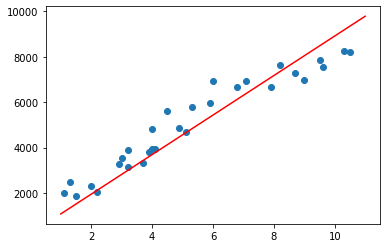

In [59]:
fig2 = plot_model(inputs, targets, model2)

### Vizualizácia priebehu chyby
Táto vizuálizácia nám vie kadečo napovedať. Hlavne to, či chyba klesala až sa dostala k nejakej konvengencií (našla optimum a už neklesala)

Doplníme funkciu `train` o pár drobností

In [60]:
def train(inputs, targets, model, epochs, learning_rate=1e-5):
    losses = []
    for i in range(epochs):
        preds = use_model(inputs, model)
        loss = MSE(preds, targets)
        loss.backward()
        loss_value = loss.item()
        losses.append(loss_value)
        with torch.no_grad():
            w, b = model
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()
    return losses

In [61]:
model3 = create_random_model()
losses = train(inputs, targets, model3, 15000)

In [62]:
print(len(losses))

15000


In [63]:
losses[1:10]

[29808696.0,
 29765708.0,
 29722788.0,
 29679930.0,
 29637132.0,
 29594402.0,
 29551734.0,
 29509124.0,
 29466578.0]

Pozmeníme aj funkciu na vykreslenie modelu. Použijeme funkciu `subplots` na vytvorenie viacerých častí jedného grafu -> tzv. podgrafy.

In [64]:
def plot_model(inputs, targets, model, losses):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
    
    ax1.scatter(inputs, targets)
    x = torch.from_numpy(np.linspace(1, 11, 2))
    y = use_model(x, model).detach()
    ax1.plot(x, y, color="r")
    ax1.set_xlabel("years of practice")
    ax1.set_ylabel("salary")
    
    ax2.plot(losses, color="g")
    ax2.set_ylim(bottom=0)
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("loss")
    
    plt.show()
    return fig

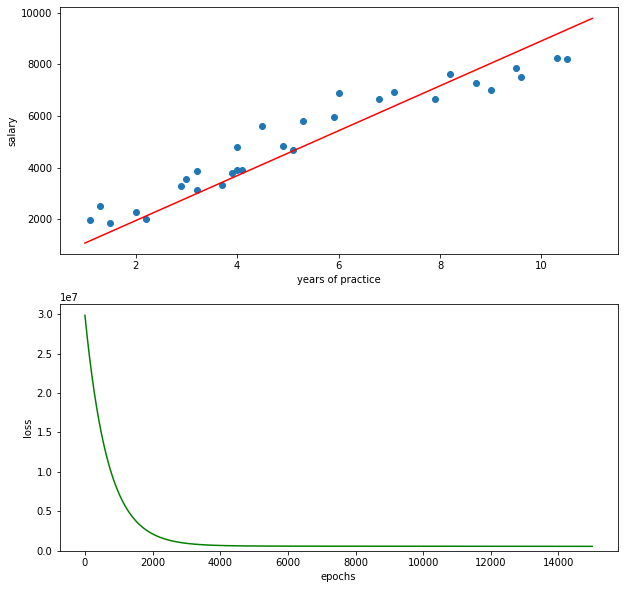

In [65]:
fig3 = plot_model(inputs, targets, model3, losses)

## Normalizácia
Aj posledná chyba v zozname je stále príliš obrovské číslo

In [66]:
losses[-1]

564674.125

Pracujeme totiž s veľkými číslami v doméne platov

In [67]:
targets.max().item()

8266.0

Definujeme funkciu normalizácie, ktorá automaticky nájde `max` a `min` a preškáluje hodnoty na interval `[0, 1]`

In [68]:
def normalize(x):
    x_min = x.min().item()
    x_max = x.max().item()
    nx = x.clone().detach()
    nx = (nx - x_min) / (x_max - x_min)
    return nx

In [69]:
ninputs = normalize(inputs)
print(ninputs)

tensor([[0.0000],
        [0.0213],
        [0.0426],
        [0.0957],
        [0.1170],
        [0.1915],
        [0.2021],
        [0.2234],
        [0.2234],
        [0.2766],
        [0.2979],
        [0.3085],
        [0.3085],
        [0.3191],
        [0.3617],
        [0.4043],
        [0.4255],
        [0.4468],
        [0.5106],
        [0.5213],
        [0.6064],
        [0.6383],
        [0.7234],
        [0.7553],
        [0.8085],
        [0.8404],
        [0.8936],
        [0.9043],
        [0.9787],
        [1.0000]])


In [70]:
ninputs = normalize(inputs)
ntargets = normalize(targets)

Skúsme natrénovať model na škálovaných hodnotách

In [71]:
model_1 = create_random_model()
losses = train(ninputs, ntargets, model_1, 15000)

Musíme pozmeniť funkciu vykreslenia modelu. Teraz sa pohybujeme v intervale `[0, 1]`, takže funkciu patrične opravíme.

In [72]:
def plot_model(inputs, targets, model, losses):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
    
    ax1.scatter(inputs, targets)
    x = torch.from_numpy(np.linspace(0, 1, 2))
    y = use_model(x, model).detach()
    ax1.plot(x, y, color="r")
    ax1.set_xlabel("years of practice")
    ax1.set_ylabel("salary")
    
    ax2.plot(losses, color="g")
    ax2.set_ylim(bottom=0)
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("loss")
    
    plt.show()
    return fig

Dajme dokopy všetky funkcie. Vytvorenie náhodného modelu, trénovanie aj vykreslenie. Takto sa môžeme pohrať s rôznymi parametrami aby sme zistili ako sa model správa a či vieme nájsť správne parametre.

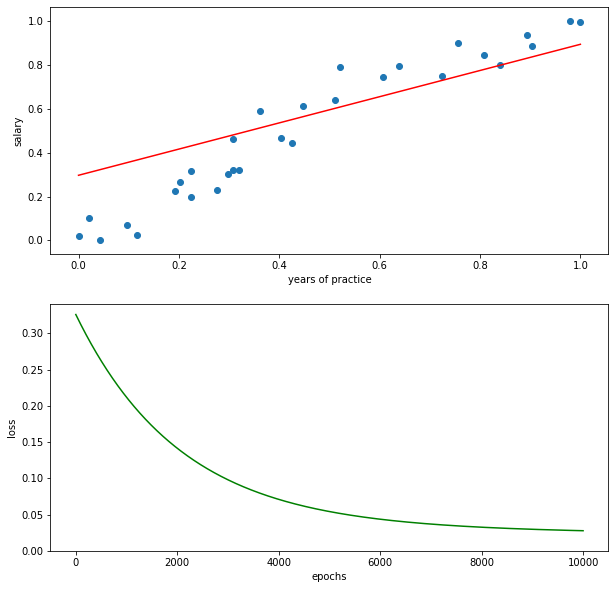

In [73]:
model_1 = create_random_model()
losses = train(ninputs, ntargets, model_1, 10000, learning_rate=0.0001)
fig1 = plot_model(ninputs, ntargets, model_1, losses)

## Finálny program
Aby sme dielo dokonaly, musíme napísať aj funkciu, ktorá preškáluje hodnoty z `[0, 1]` späť na doménu platov.

In [74]:
def rescale(x, x_min, x_max):
    sx = x.clone().detach()
    sx = sx * (x_max - x_min) + x_min
    return sx

In [75]:
stargets = rescale(ntargets, 1857, 8266)
print(stargets)
print(targets)

tensor([[1979.],
        [2498.],
        [1857.],
        [2295.],
        [2020.],
        [3288.],
        [3554.],
        [3122.],
        [3879.],
        [3330.],
        [3786.],
        [3924.],
        [4812.],
        [3922.],
        [5627.],
        [4844.],
        [4699.],
        [5791.],
        [5960.],
        [6912.],
        [6646.],
        [6940.],
        [6670.],
        [7617.],
        [7285.],
        [6994.],
        [7856.],
        [7528.],
        [8266.],
        [8227.]])
tensor([[1979.],
        [2498.],
        [1857.],
        [2295.],
        [2020.],
        [3288.],
        [3554.],
        [3122.],
        [3879.],
        [3330.],
        [3786.],
        [3924.],
        [4812.],
        [3922.],
        [5627.],
        [4844.],
        [4699.],
        [5791.],
        [5960.],
        [6912.],
        [6646.],
        [6940.],
        [6670.],
        [7617.],
        [7285.],
        [6994.],
        [7856.],
        [7528.],
        [8266

Musíme pozmeniť aj funkciu normalize, aby nám dobre poslúžila pre funkciu `predpovedaj_plat`.

In [76]:
def normalize(x, x_min, x_max):
    nx = x.clone().detach()
    nx = (nx - x_min) / (x_max - x_min)
    return nx

def predpovedaj_plat(pocet_rokov):
    years = torch.tensor(pocet_rokov)
    nyears = normalize(years, 1.1, 10.5 )
    pred = use_model(nyears, model_1)
    salary = rescale(pred, 1857, 8266)
    return salary.item()


In [77]:
plat = predpovedaj_plat(30)
print("po 30 rokoch budes zarabat {:.2f} EUR".format(plat))

po 30 rokoch budes zarabat 15528.87 EUR
